In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix



warnings.filterwarnings('ignore')
matplotlib.rc('font', family='NanumGothic')

In [2]:
df=pd.read_csv('유방암.csv', engine='python', encoding='949')
df.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.isnull().sum()

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [4]:
df_y=df["diagnosis"]
df_x=df.drop('diagnosis',axis=1,inplace=False)

In [5]:
df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_x,df_y,test_size=0.6,random_state=1234)
df_val_x,df_test_x,df_val_y,df_test_y = train_test_split(df_test_x,df_test_y,test_size=0.5,
                                                                       random_state=1234)

print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('validation data X size : {}'.format(df_val_x.shape))
print('validation data Y size : {}'.format(df_val_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (227, 30)
train data Y size : (227,)
validation data X size : (171, 30)
validation data Y size : (171,)
test data X size : (171, 30)
test data Y size : (171,)


In [41]:
knn_uncustomized=KNeighborsClassifier()
knn_uncustomized.fit(df_train_x,df_train_y)
print('Accuracy on training set:{:.3f}'.format(knn_uncustomized.score(df_train_x,df_train_y)))
print('Accuracy on validation set:{:.3f}'.format(knn_uncustomized.score(df_val_x,df_val_y)))

Accuracy on training set:0.943
Accuracy on validation set:0.947


In [42]:
knn_uncustomized

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [44]:
train_accuracy=[]; val_accuracy=[]
para_n_neighbors=[i for i in range(1,16)]

# para_n_neighbors
    
for v_n_neighbors in para_n_neighbors:
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    val_accuracy.append(knn.score(df_val_x,df_val_y))

df_accuracy_knn=pd.DataFrame()
df_accuracy_knn['Neighbors']=para_n_neighbors
df_accuracy_knn['TrainAccuracy']=train_accuracy
df_accuracy_knn['ValidationAccuracy']=val_accuracy

df_accuracy_knn.round(3)

,Neighbors,TrainAccuracy,ValidationAccuracy
0,1,1.000,0.901
1,2,0.956,0.895
2,3,0.960,0.918
3,4,0.947,0.901
4,5,0.943,0.947
5,6,0.947,0.930
6,7,0.938,0.936
7,8,0.943,0.942
8,9,0.938,0.936
9,10,0.934,0.936


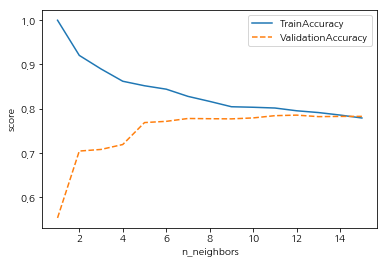

In [12]:
plt.plot(para_n_neighbors, train_accuracy, linestyle='-',label='TrainAccuracy')
plt.plot(para_n_neighbors, val_accuracy, linestyle='--',label='ValidationAccuracy')
plt.ylabel('score');plt.xlabel('n_neighbors')
plt.legend()

In [45]:
train_accuracy=[]; val_accuracy=[]
para_n_neighbors=[i for i in range(1,11)]*2
para_weights=['uniform']*10+['distance']*10

# para_weights
    
for v_n_neighbors,v_weights in zip(para_n_neighbors, para_weights):
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors, weights=v_weights)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    val_accuracy.append(knn.score(df_val_x,df_val_y))

df_accuracy_weight=pd.DataFrame()
df_accuracy_weight['Neighbors']=para_n_neighbors
df_accuracy_weight['Weights']=para_weights
df_accuracy_weight['TrainAccuracy']=train_accuracy
df_accuracy_weight['ValidationAccuracy']=val_accuracy

df_accuracy_weight.head()

,Neighbors,Weights,TrainAccuracy,ValidationAccuracy
0,1,uniform,1.000000,0.900585
1,2,uniform,0.955947,0.894737
2,3,uniform,0.960352,0.918129
3,4,uniform,0.947137,0.900585
4,5,uniform,0.942731,0.947368


In [15]:
df_accuracy_weight_pivot=df_accuracy_weight.pivot(index='Neighbors',columns='Weights',
                                            values=['TrainAccuracy','ValidationAccuracy'])

df_accuracy_weight_pivot.head()

TrainAccuracy           ValidationAccuracy          
Weights        distance   uniform           distance   uniform
Neighbors                                                     
1                   1.0  1.000000           0.552632  0.552632
2                   1.0  0.920440           0.701620  0.703947
3                   1.0  0.889759           0.709478  0.707602
4                   1.0  0.861939           0.723026  0.718750
5                   1.0  0.851737           0.761245  0.768421

In [17]:
level0=df_accuracy_weight_pivot.columns.get_level_values(0)
level1=df_accuracy_weight_pivot.columns.get_level_values(1)
df_accuracy_weight_pivot.columns=level0+'_'+level1
df_accuracy_weight_pivot.head()

,TrainAccuracy_distance,TrainAccuracy_uniform,ValidationAccuracy_distance,ValidationAccuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.552632,0.552632
2,1.0,0.920440,0.701620,0.703947
3,1.0,0.889759,0.709478,0.707602
4,1.0,0.861939,0.723026,0.718750
5,1.0,0.851737,0.761245,0.768421


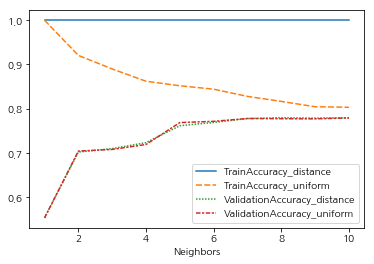

In [19]:
sns.lineplot(data=df_accuracy_weight_pivot)

In [46]:
train_accuracy=[]; val_accuracy=[]
para_n_neighbors=[i for i in range(1,11)]*3
para_metric=['minkowski']*10+['euclidean']*10+['manhattan']*10

# para_metric
    
for v_n_neighbors,v_metric in zip(para_n_neighbors, para_metric):
    knn=KNeighborsClassifier(weights='uniform', n_neighbors=v_n_neighbors, metric=v_metric)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x,df_train_y))
    val_accuracy.append(knn.score(df_val_x,df_val_y))

df_accuracy_metric=pd.DataFrame()
df_accuracy_metric['Neighbors']=para_n_neighbors
df_accuracy_metric['Metric']=para_metric
df_accuracy_metric['TrainAccuracy']=train_accuracy
df_accuracy_metric['ValidationAccuracy']=val_accuracy

df_accuracy_metric.round(3).head()

,Neighbors,Metric,TrainAccuracy,ValidationAccuracy
0,1,minkowski,1.000,0.901
1,2,minkowski,0.956,0.895
2,3,minkowski,0.960,0.918
3,4,minkowski,0.947,0.901
4,5,minkowski,0.943,0.947


In [25]:
df_accuracy_metric_pivot=df_accuracy_metric.pivot(index='Neighbors',columns='Metric',
                                            values=['TrainAccuracy','ValidationAccuracy'])
df_accuracy_metric_pivot.head()

TrainAccuracy                     ValidationAccuracy            \
Metric        euclidean manhattan minkowski          euclidean manhattan   
Neighbors                                                                  
1              1.000000  1.000000  1.000000           0.552632  0.631579   
2              0.920440  0.929800  0.920440           0.703947  0.782895   
3              0.889759  0.887679  0.889759           0.707602  0.801170   
4              0.861939  0.868959  0.861939           0.718750  0.792763   
5              0.851737  0.862969  0.851737           0.768421  0.812632   

                     
Metric    minkowski  
Neighbors            
1          0.552632  
2          0.703947  
3          0.707602  
4          0.718750  
5          0.768421

In [26]:
level0=df_accuracy_metric_pivot.columns.get_level_values(0)
level1=df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns=level0+'_'+level1
df_accuracy_metric_pivot.head()

,TrainAccuracy_euclidean,TrainAccuracy_manhattan,TrainAccuracy_minkowski,ValidationAccuracy_euclidean,ValidationAccuracy_manhattan,ValidationAccuracy_minkowski
Neighbors,,,,,,
1,1.000000,1.000000,1.000000,0.552632,0.631579,0.552632
2,0.920440,0.929800,0.920440,0.703947,0.782895,0.703947
3,0.889759,0.887679,0.889759,0.707602,0.801170,0.707602
4,0.861939,0.868959,0.861939,0.718750,0.792763,0.718750
5,0.851737,0.862969,0.851737,0.768421,0.812632,0.768421


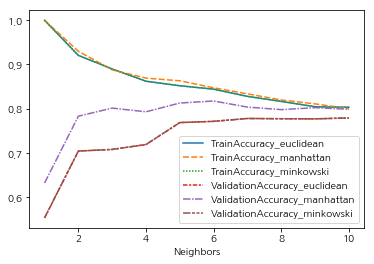

In [27]:
sns.lineplot(data=df_accuracy_metric_pivot)

In [49]:
knn_final=KNeighborsClassifier(n_neighbors=4, weights='uniform', metric='euclidean')
knn_final.fit(df_train_x,df_train_y)
y_pred = knn_final.predict(df_val_x)
print('Accuracy on training set:{:.3f}'.format(knn_final.score(df_train_x,df_train_y)))
print('Accuracy on validation set:{:.3f}'.format(knn_final.score(df_val_x,df_val_y)))
print('Accuracy on test set:{:.3f}\n'.format(knn_final.score(df_test_x,df_test_y)))
print('Confusion matrix:\n{}'.format(confusion_matrix(df_val_y,y_pred)))

Accuracy on training set:0.947
Accuracy on validation set:0.901
Accuracy on test set:0.906

Confusion matrix:
[[112   2]
 [ 15  42]]
